# Dogs and Cats

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1pCgqramvhpXzHPMGwQQAtgWDgNOhl9Ek'
output = 'model.rishikeshdewalkar01-0.59.keras'  # Desired output filename

# Download the file
gdown.download(url, output, quiet=False)



## Dataset

In [ ]:
import pathlib
import os
import shutil

In [45]:
base_dir = pathlib.Path('D:/Masters/Pattern Recognition and Neural Networks/Assignment 10/dogs-vs-cats')
src_dir = pathlib.Path('D:/Masters/Pattern Recognition and Neural Networks/Assignment 10/dogs-vs-cats-original/train')

In [4]:
print(base_dir / 'test')

dogs-vs-cats\test


In [5]:
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')

In [6]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)

src:dogs-vs-cats-original\train\dog.0.jpg => dst:dogs-vs-cats\train\dog\dog.0.jpg
src:dogs-vs-cats-original\train\dog.100.jpg => dst:dogs-vs-cats\train\dog\dog.100.jpg
src:dogs-vs-cats-original\train\dog.200.jpg => dst:dogs-vs-cats\train\dog\dog.200.jpg
src:dogs-vs-cats-original\train\dog.300.jpg => dst:dogs-vs-cats\train\dog\dog.300.jpg
src:dogs-vs-cats-original\train\dog.400.jpg => dst:dogs-vs-cats\train\dog\dog.400.jpg
src:dogs-vs-cats-original\train\dog.500.jpg => dst:dogs-vs-cats\train\dog\dog.500.jpg
src:dogs-vs-cats-original\train\dog.600.jpg => dst:dogs-vs-cats\train\dog\dog.600.jpg
src:dogs-vs-cats-original\train\dog.700.jpg => dst:dogs-vs-cats\train\dog\dog.700.jpg
src:dogs-vs-cats-original\train\dog.800.jpg => dst:dogs-vs-cats\train\dog\dog.800.jpg
src:dogs-vs-cats-original\train\dog.900.jpg => dst:dogs-vs-cats\train\dog\dog.900.jpg
src:dogs-vs-cats-original\train\cat.0.jpg => dst:dogs-vs-cats\train\cat\cat.0.jpg
src:dogs-vs-cats-original\train\cat.100.jpg => dst:dogs-vs-cat

In [7]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

src:dogs-vs-cats-original\train\dog.1000.jpg => dst:dogs-vs-cats\validation\dog\dog.1000.jpg
src:dogs-vs-cats-original\train\dog.1100.jpg => dst:dogs-vs-cats\validation\dog\dog.1100.jpg
src:dogs-vs-cats-original\train\dog.1200.jpg => dst:dogs-vs-cats\validation\dog\dog.1200.jpg
src:dogs-vs-cats-original\train\dog.1300.jpg => dst:dogs-vs-cats\validation\dog\dog.1300.jpg
src:dogs-vs-cats-original\train\dog.1400.jpg => dst:dogs-vs-cats\validation\dog\dog.1400.jpg
src:dogs-vs-cats-original\train\cat.1000.jpg => dst:dogs-vs-cats\validation\cat\cat.1000.jpg
src:dogs-vs-cats-original\train\cat.1100.jpg => dst:dogs-vs-cats\validation\cat\cat.1100.jpg
src:dogs-vs-cats-original\train\cat.1200.jpg => dst:dogs-vs-cats\validation\cat\cat.1200.jpg
src:dogs-vs-cats-original\train\cat.1300.jpg => dst:dogs-vs-cats\validation\cat\cat.1300.jpg
src:dogs-vs-cats-original\train\cat.1400.jpg => dst:dogs-vs-cats\validation\cat\cat.1400.jpg


In [8]:
make_dataset_for_image_dataset_from_directory('test', 1500, 2500)

src:dogs-vs-cats-original\train\dog.1500.jpg => dst:dogs-vs-cats\test\dog\dog.1500.jpg
src:dogs-vs-cats-original\train\dog.1600.jpg => dst:dogs-vs-cats\test\dog\dog.1600.jpg
src:dogs-vs-cats-original\train\dog.1700.jpg => dst:dogs-vs-cats\test\dog\dog.1700.jpg
src:dogs-vs-cats-original\train\dog.1800.jpg => dst:dogs-vs-cats\test\dog\dog.1800.jpg
src:dogs-vs-cats-original\train\dog.1900.jpg => dst:dogs-vs-cats\test\dog\dog.1900.jpg
src:dogs-vs-cats-original\train\dog.2000.jpg => dst:dogs-vs-cats\test\dog\dog.2000.jpg
src:dogs-vs-cats-original\train\dog.2100.jpg => dst:dogs-vs-cats\test\dog\dog.2100.jpg
src:dogs-vs-cats-original\train\dog.2200.jpg => dst:dogs-vs-cats\test\dog\dog.2200.jpg
src:dogs-vs-cats-original\train\dog.2300.jpg => dst:dogs-vs-cats\test\dog\dog.2300.jpg
src:dogs-vs-cats-original\train\dog.2400.jpg => dst:dogs-vs-cats\test\dog\dog.2400.jpg
src:dogs-vs-cats-original\train\cat.1500.jpg => dst:dogs-vs-cats\test\cat\cat.1500.jpg
src:dogs-vs-cats-original\train\cat.1600.jp

### We are ready to create image_dataset_from_directory

In [9]:
import tensorflow as tf

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1]


In [12]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.


In [13]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


### Designing CNN architecture

In [14]:
import tensorflow as tf
from tensorflow.keras import layers

In [15]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [16]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 89, 89, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 43, 43, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 20, 20, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,185 (192.13 KB)

 Trainable params: 49,185 (192.13 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [20]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5117 - loss: 0.7386 - val_accuracy: 0.5420 - val_loss: 0.6912
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5771 - loss: 0.6803 - val_accuracy: 0.5590 - val_loss: 0.6887
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6167 - loss: 0.6578 - val_accuracy: 0.6410 - val_loss: 0.6344
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6566 - loss: 0.6253 - val_accuracy: 0.6680 - val_loss: 0.6117
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6801 - loss: 0.5982 - val_accuracy: 0.6060 - val_loss: 0.6649
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6755 - loss: 0.5943 - val_accuracy: 0.6770 - val_loss: 0.5957
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7234 - loss: 0.5459 - val_accuracy: 0.6700 - val_loss: 0.6004
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7435 - loss: 0.5170 - val_accuracy: 0.6550 - v

In [21]:
import matplotlib.pyplot as plt

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

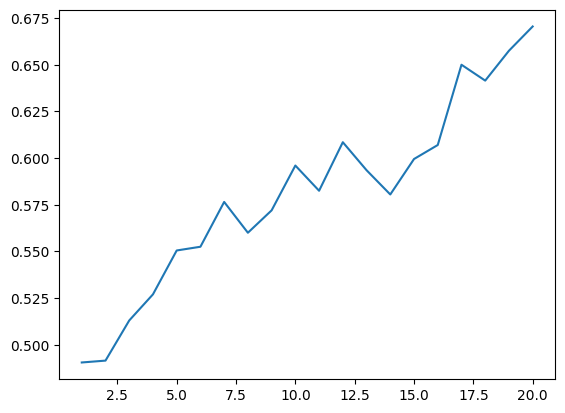

In [43]:
plt.plot(range(1, len(acc)+1), acc, label='Training Accuracy')

In [24]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [26]:
predictions

array([[0.5907747 ],
       [0.70776075],
       [0.28923616],
       [0.5941528 ],
       [0.3474821 ],
       [0.4063493 ],
       [0.71385455],
       [0.70954144],
       [0.4031255 ],
       [0.6230515 ],
       [0.53585804],
       [0.47398162],
       [0.32341412],
       [0.99970996],
       [0.4386084 ],
       [0.8837586 ],
       [0.3302065 ],
       [0.38935566],
       [0.8323313 ],
       [0.8121686 ],
       [0.14773479],
       [0.50427055],
       [0.930019  ],
       [0.81062174],
       [0.5624787 ],
       [0.5555792 ],
       [0.5976771 ],
       [0.7593938 ],
       [0.7941836 ],
       [0.39041236],
       [0.89025325],
       [0.6841314 ]], dtype=float32)

### Data Augmentation

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [29]:
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [30]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [31]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 89, 89, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 43, 43, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 20, 20, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 9, 9, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │     4,147,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,536,017 (17.30 MB)

 Trainable params: 4,536,017 (17.30 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.rishikeshdewalkar{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
]

In [42]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.6960 - loss: 0.6024 - val_accuracy: 0.6680 - val_loss: 0.5917
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.6786 - loss: 0.5981 - val_accuracy: 0.6630 - val_loss: 0.6057
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6876 - loss: 0.5928 - val_accuracy: 0.6880 - val_loss: 0.5865
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.7190 - loss: 0.5673 - val_accuracy: 0.6890 - val_loss: 0.5813
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.7066 - loss: 0.5696 - val_accuracy: 0.6810 - val_loss: 0.5874
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.6919 - loss: 0.5875 - val_accuracy: 0.7050 - val_loss: 0.5759
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.7149 - loss: 0.5577 - val_accuracy: 0.6830 - val_loss: 0.5745
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.7008 - loss: 0.5615 - val_accuracy: 0.693

In [36]:
acc = history.history['accuracy']
loss = history.history['loss']

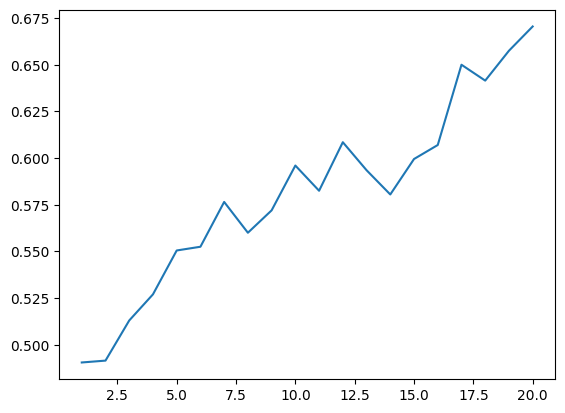

In [62]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(acc)+1), acc, label='Training Accuracy')

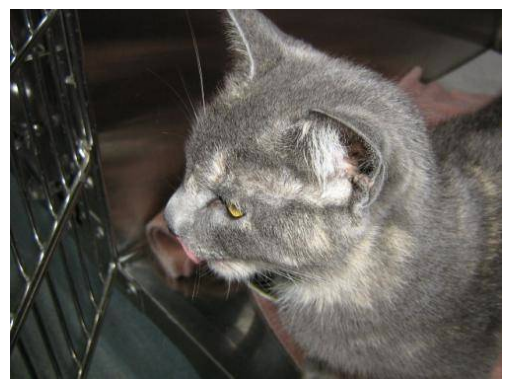

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
[[0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.03227971]
 [0.0322797 ]
 [0.0322797 ]]


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load image
image = Image.open(".../dogs-vs-cats/test/cat/cat.1506.jpg")

# Display the image using matplotlib
plt.imshow(np.array(image))  # Convert PIL Image to numpy array for displaying
plt.axis('off')  # Hide axes
plt.show()

# Convert image to tensor and preprocess
image = tf.convert_to_tensor(np.array(image), dtype=tf.float32)  # Convert PIL to numpy array, then to tensor
image = tf.image.resize(image, (180, 180))  # Resize the image
image = image / 255.0  # Normalize the image
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.tile(image, [32, 1, 1, 1])  # Duplicate image 32 times for batch

# Assuming the model is pre-loaded
model = tf.keras.models.load_model('model.rishikeshdewalkar01-0.59.keras')  # Load the model (use the correct path)

# Make predictions
predictions = model.predict(image)
print(predictions)  # Output the predictions


In [68]:
class dogs_cats:
    def __init__(self):
        self.train_dataset = None
        self.validation_dataset = None
        self.test_dataset = None
        self.model = None
        self.base_dir = pathlib.Path('dogs-vs-cats')
        self.src_dir = pathlib.Path('dogs-vs-cats-original/train')

    def make_dataset_folders(self, subset_name, start_index, end_index):
        for category in ("dog", "cat"):
            dir = self.base_dir / subset_name / category
            #print(dir)
            if os.path.exists(dir) is False:
                os.makedirs(dir)
            files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
            #print(files)
            for i, file in enumerate(files):
                shutil.copyfile(src=self.src_dir / file, dst=dir / file)
                if i % 100 == 0: # show only once every 100
                    print(f'src:{self.src_dir / file} => dst:{dir / file}')
    
    def _make_dataset(self, subset_name):
        dataset = tf.keras.utils.image_dataset_from_directory(
            self.base_dir / subset_name,
            image_size=(180,180),
            batch_size=32
        )

        return dataset
    
    def make_dataset(self):
        self.train_dataset = self._make_dataset('train')
        self.validation_dataset = self._make_dataset('validation')
        self.test_dataset = self._make_dataset('test')

    def build_network(self, augmentation=True):
        inputs = layers.Input(shape=(180, 180, 3))
        x = layers.Rescaling(1./255)(inputs)
        x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
        x = layers.AveragePooling2D(pool_size=2)(x)
        x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
        x = layers.AveragePooling2D(pool_size=2)(x)
        x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
        x = layers.AveragePooling2D(pool_size=2)(x)

        x = layers.Flatten()(x)
        outputs = layers.Dense(1, activation="sigmoid")(x)

        self.model = tf.keras.Model(inputs=inputs, outputs=outputs)

        self.model.compile(loss='binary_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])
        
        return self.model
    
    def train(self, model_name):
        model_name = self.build_network()

        callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=2),
            tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
            tf.keras.callbacks.TensorBoard(log_dir='./logs'),
        ]

        history = model_name.fit(self.train_dataset, epochs=20, 
                            validation_data=self.validation_dataset, 
                            callbacks=callbacks)
        
        acc = history.history['accuracy']
        loss = history.history['loss']

        plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')
        plt.show()

    def load_model(self, model_name):
        self.model = load_model(f"{model_name}.keras")
        print("Successfully loaded model")
    
    def predict(self, image_file):
        image = Image.open(image_file)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
        image = tf.convert_to_tensor(image, dtype=tf.float32)  
        image = tf.image.resize(image, (180, 180)) 
        image = image / 255.0  
        image = tf.expand_dims(image, axis=0)  
        image = tf.tile(image, [32, 1, 1, 1]) 

        predictions = self.model.predict(image)

        return predictions